# Before PCA , clustering on og dataset

#Hiearchical

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [2]:
wine=pd.read_csv('wine.csv')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
wine.drop(['Type'], axis = 1, inplace = True)
wine

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
scaler = StandardScaler()
df= scaler.fit_transform(wine.iloc[:,0:])
df

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

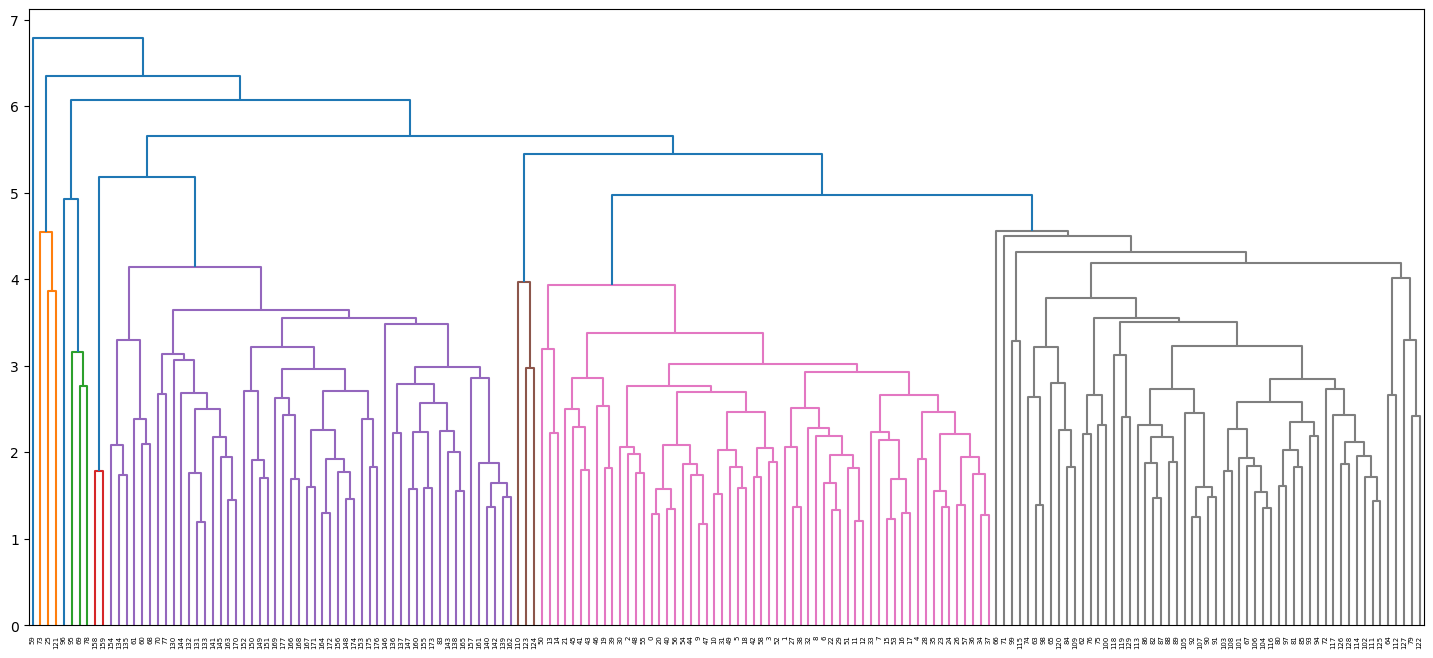

In [7]:
plt.figure(figsize = (18,8))
dendrogram = sch.dendrogram(sch.linkage(df, method='average'))

In [8]:
hc = AgglomerativeClustering(n_clusters =20,
                             affinity = 'euclidean',
                             linkage = 'average')

In [9]:
y_hc = hc.fit_predict(df)
y_hc

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2, 18,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
        2,  2,  2,  2,  2,  2,  2,  2, 15,  6,  6,  1,  4,  7,  4, 19,  1,
        6,  9,  0, 11,  1, 10,  4,  1,  1,  0,  9,  5,  1,  1,  1,  0,  4,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9, 17,  1,  4, 12,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  4, 16,  1,  7,  1,  1, 12,  1,  1,  1,
        1,  4, 14,  5,  8,  8,  1,  1,  5,  1,  1,  0,  0,  0,  0,  6,  6,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  6,  0,  0,  0, 13, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [10]:
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,2
...,...
173,0
174,0
175,0
176,0


In [11]:
wine['h_clusterid'] = Clusters
wine

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [12]:
wine.sort_values('h_clusterid')

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,0
148,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650,0
147,12.87,4.61,2.48,21.5,86,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625,0
146,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415,0
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,15
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562,16
96,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625,17
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830,18


#K means

In [13]:
wcss = []
sil_score = []
cal_haz_score = []

for i in range(1,50 ):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue 
    sil_score.append(silhouette_score(df, kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(df, kmeans.labels_))

C:\Users\hites\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
wcss

[2314.0000000000005,
 1659.0079672511501,
 1278.7607763668145,
 1175.705192819712,
 1113.0208821682088,
 1044.0780493140437,
 999.5493686263304,
 951.4917384013688,
 889.5309779249254,
 851.8813851482951,
 842.2251528844216,
 790.7665737168923,
 767.0493564324912,
 734.6641958447947,
 730.2662463623466,
 704.2862019154314,
 679.4883691163437,
 674.770253970282,
 633.4142467452989,
 625.831339015709,
 603.3980455438734,
 596.4711224102031,
 584.2544118287326,
 560.8344363135802,
 551.1810499271295,
 546.0093976515069,
 534.0567549632608,
 520.3063201883856,
 512.6295952336562,
 498.50363880623337,
 488.5399874320184,
 481.30114664209634,
 465.6240394368306,
 461.1822734412829,
 444.27496608570004,
 450.14953893387985,
 438.63688682809806,
 427.6438983549643,
 417.50465966324543,
 402.22486359500215,
 400.2538156876103,
 397.4101772422063,
 386.10929522414733,
 375.35944414985215,
 375.55612997778275,
 359.5830764033665,
 357.7457772330285,
 346.7518730271824,
 340.6330348326195]

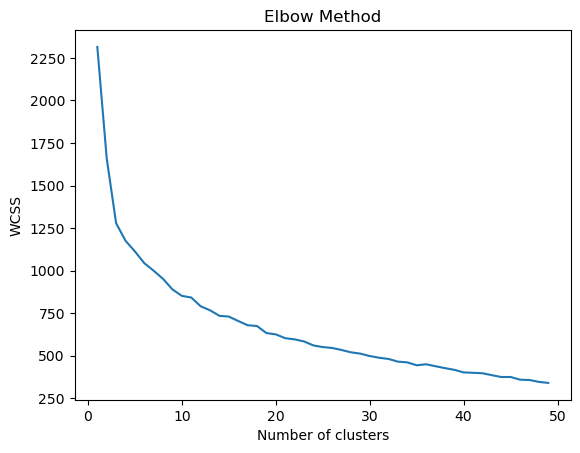

In [15]:
plt.plot(range(1, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
clusters_new = KMeans(32, random_state = 42)
clusters_new.fit(df)

KMeans(n_clusters=32, random_state=42)

In [17]:
clusters_new.labels_

array([ 4, 25, 28, 27,  6, 27, 11,  3, 11,  4, 28, 11, 11, 19, 19,  3,  3,
        3, 27,  4,  4, 18, 11, 25, 18,  6, 11, 25,  3, 11, 28, 27, 11,  3,
        3, 28,  3, 25, 25,  4,  4, 18,  4, 18,  4, 18,  4,  4, 28, 27, 19,
       11, 27,  3,  4, 28,  4,  3, 27,  7, 26, 17, 25, 13, 21,  1, 13, 14,
       26,  8, 15, 13, 14, 24, 13, 15,  1, 15,  8,  0,  1,  1, 21, 23, 16,
        1, 21, 21, 10, 21, 10, 10, 10,  1, 13,  8, 30,  1, 13,  1,  1, 14,
       16, 14, 14, 10, 14, 10, 14, 16, 12, 14, 21, 21, 21, 21, 14, 14, 29,
       14, 16, 31,  0,  0, 16, 14, 16, 21, 14,  0,  9,  9,  9,  9, 17, 17,
       23, 23, 29,  5,  5, 29,  5, 23, 20, 29, 29,  2,  2, 20, 20, 20,  9,
        2, 17,  2,  2,  5, 22, 22,  2,  5,  5, 29,  2, 29, 20,  2, 20, 20,
       29,  2,  2,  2,  2, 20, 20,  2])

In [18]:
wine['clusterid_new'] = clusters_new.labels_
wine

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,clusterid_new
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,4
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,25
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,28
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,27
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,20
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,20


In [19]:
wine.sort_values('clusterid_new')

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,clusterid_new
79,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463,5,0
122,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365,5,0
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380,8,0
129,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580,1,0
100,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675,0,29
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830,0,29
170,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510,0,29
96,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625,17,30


# After PCA

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [21]:
wine1=pd.read_csv('wine.csv')

In [22]:
wine1.drop(['Type'], axis = 1, inplace = True)
wine1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [23]:
pca = PCA()

pca_values = pca.fit_transform(df)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [24]:
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [25]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [26]:
var1 = np.cumsum(np.round(var, decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [27]:
df1=pd.DataFrame(data=pca_values)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


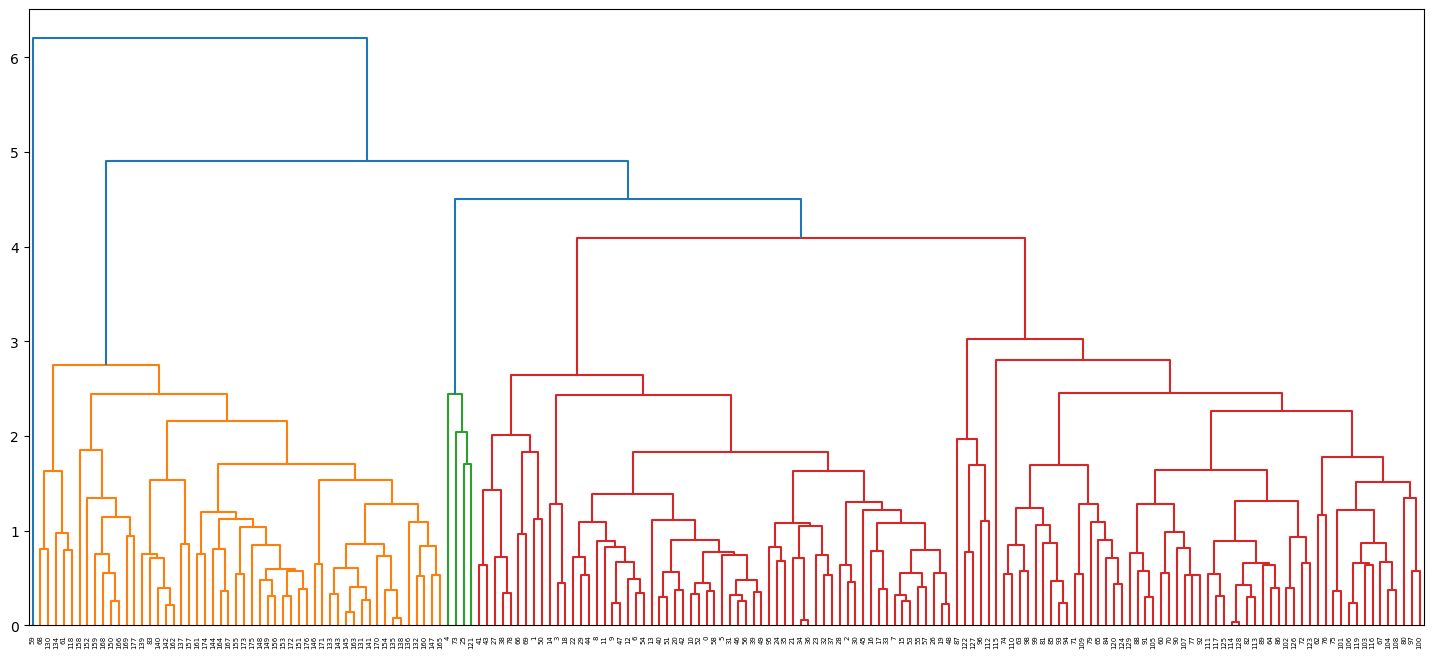

In [41]:
plt.figure(figsize = (18,8))
dendrogram = sch.dendrogram(sch.linkage(df1.iloc[:,:3], method='average'))

In [42]:
hc1 = AgglomerativeClustering(n_clusters =32,
                             affinity = 'euclidean',
                             linkage = 'average')

In [45]:
y_hc1 = hc1.fit_predict(df1.iloc[:,:3])
y_hc1

array([ 1, 21,  9,  5, 23,  1,  1,  9,  1,  1,  1,  1,  1,  1,  5,  9,  9,
        9,  5,  9,  1, 13,  1, 13, 13, 22,  9,  0,  9,  1,  9,  1, 13,  9,
       13, 13, 13, 13,  0,  1,  1,  0,  1,  0,  1,  9,  1,  1,  9,  1, 21,
        1,  1,  9,  1,  9,  1,  9,  1, 31, 12, 19, 10, 25,  2, 26, 20,  7,
       28, 20, 12, 26,  2, 16, 25,  7, 10, 12,  0, 26,  4, 25,  2, 14, 26,
       25,  2, 17, 12,  2, 12, 12, 12, 25, 25, 13, 15,  4, 25, 25,  4,  7,
        2,  7,  7, 12,  7, 12,  7, 26, 25,  2, 15,  2,  2, 27,  7,  2, 19,
        7, 26, 29, 24,  2, 26,  2,  2, 24,  2, 12, 28,  6,  6,  6, 19,  6,
        6,  8,  6, 14, 14,  6, 14,  6, 11,  6, 30,  6, 11, 11,  3, 11,  3,
       11,  6, 11, 11,  8, 18,  3,  6, 11, 14,  6, 11,  6,  3, 11,  3,  3,
        6, 30, 11, 11, 11, 11, 11,  3], dtype=int64)

In [46]:
clusters = pd.DataFrame(y_hc1, columns=['Clusters'])
clusters

,Clusters
0,1
1,21
2,9
3,5
4,23
...,...
173,11
174,11
175,11
176,11


In [48]:
wine1['clusterid'] = clusters
wine1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid,clusterid_new
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,4
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,21,25
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,9,28
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,5,27
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,23,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,11,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,11,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,11,20
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,11,20


In [49]:
wine1.sort_values('clusterid')

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid,clusterid_new
27,13.30,1.72,2.14,17.0,94,2.40,2.19,0.27,1.35,3.950000,1.02,2.77,1285,0,25
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.400000,1.06,2.31,750,0,8
43,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.360000,0.82,3.00,680,0,18
41,13.41,3.84,2.12,18.8,90,2.45,2.68,0.27,1.48,4.280000,0.91,3.00,1035,0,18
38,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.700000,1.18,2.69,1020,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630,28,9
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.000000,0.93,3.69,465,29,31
146,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.900000,0.58,1.33,415,30,29
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,30,2


In [50]:
wcss1 = []
sil_score1 = []
cal_haz_score1 = []

for i in range(1,50 ):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(df1.iloc[:,:3])
    wcss1.append(kmeans.inertia_)
    if i==1:
        continue 
    sil_score.append(silhouette_score(df1, kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(df1, kmeans.labels_))

C:\Users\hites\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [51]:
wcss1

[1539.503480188307,
 886.1611364823503,
 512.9995067661521,
 429.80307324736543,
 371.02394449456744,
 326.27689049596614,
 291.5270134908597,
 261.68437598859697,
 239.04461949060357,
 213.23994073321194,
 196.17745180912135,
 183.62552792780897,
 169.31757058122312,
 158.90218093656026,
 147.9344244900697,
 138.46359958813426,
 131.31160142506326,
 125.84420469450302,
 119.08126271989865,
 111.12325680987162,
 106.95632284532574,
 101.14074561193361,
 100.12913377666881,
 95.85569275267262,
 92.43110730119531,
 89.52393785101478,
 87.21752575527712,
 81.91677878476932,
 81.2825854733832,
 77.02359963606645,
 74.31443560612897,
 72.906956271002,
 71.9330811692462,
 70.32567444996401,
 66.28356748281394,
 64.2892241024976,
 62.336356396473064,
 61.2005007687323,
 60.403488799132234,
 57.77734521320742,
 56.35807216281654,
 53.85269022978057,
 52.919193030874986,
 52.040907581741614,
 48.677090813224005,
 45.8579987381617,
 46.46748117786784,
 44.323807578010005,
 43.351205119971645]

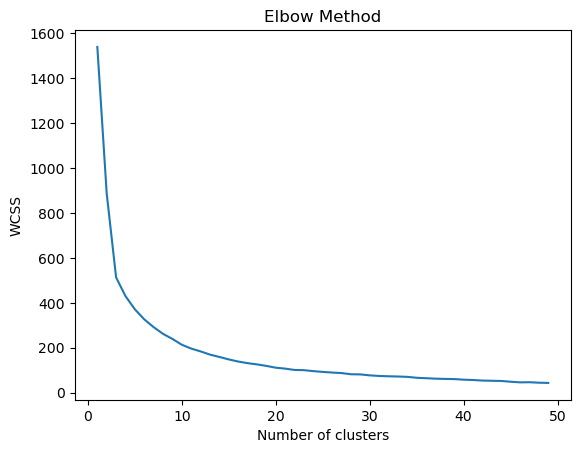

In [52]:
plt.plot(range(1, 50), wcss1)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
clusters_new1 = KMeans(32, random_state = 42)
clusters_new1.fit(df1.iloc[:,:3])

KMeans(n_clusters=32, random_state=42)

In [54]:
clusters_new1.labels_

array([28,  5, 18, 22, 18, 28, 19, 26, 19, 19, 28, 19, 19,  9,  9, 26, 26,
       26, 22,  1, 28, 11, 19, 11, 11,  6,  1, 29, 18, 19, 18, 28, 11, 18,
       11, 11, 11, 11,  5, 28,  1, 29, 28, 29, 19, 26, 28, 19,  1, 28,  9,
        1, 28, 26, 19, 26, 28,  1, 28, 10, 24, 24, 16, 25,  2, 11,  5, 12,
        0,  5, 24,  7,  2, 20, 25, 12, 16, 13,  5,  7, 14, 25, 31,  3, 25,
       14, 31, 31, 31, 31, 13, 13, 13, 14, 14, 18,  2, 14, 25, 25, 16, 12,
        2, 12, 14, 13, 12, 13, 14,  7, 25,  2, 15, 31, 31, 27, 12,  2, 24,
       12,  7,  6, 15,  2,  7,  2,  2, 15, 31, 13,  0, 21, 21, 21, 24, 21,
        3,  3, 21,  3,  3, 21,  3, 21, 21, 21,  8,  8,  4,  4, 30,  4, 30,
        4, 21,  4,  4,  3, 17, 30, 21, 21,  3, 21,  4,  8, 30,  8, 30, 23,
       21,  8,  4,  4,  4,  4,  4, 23])

In [55]:
wine1['clusterid_new'] = clusters_new.labels_
wine1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid,clusterid_new
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,4
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,21,25
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,9,28
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,5,27
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,23,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,11,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,11,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,11,20
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,11,20


In [56]:
wine1.sort_values('clusterid_new')

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid,clusterid_new
79,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463,26,0
122,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365,24,0
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380,2,0
129,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580,12,0
100,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675,6,29
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830,6,29
170,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510,6,29
96,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625,15,30
